<center>
<img
src="https://i.ibb.co/th5MTcv/logo.png" width="800" 
     />
</center>

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

## Orbit equation for a particle in a Schwarzschild's background

The equations of the obit for a particle moving in a Schwarzschild spacetime is obtained from the Lagrangian describing the system. It gives
\begin{equation}
\frac{d^2 u}{d\varphi^2} = - u +\frac{M}{\ell^2} + 3Mu^2
\end{equation}

\begin{equation}
\begin{cases}
\frac{du}{d\varphi} = & z\\
\frac{d z}{d\varphi} = & - u +\frac{M}{\ell^2} + 3Mu^2
\end{cases}
\end{equation}

where we have identified the conserved quantity 
- z-component of the angular momentum : $\ell = p_\phi$ 


### Initial Conditions 

The initial conditions needed to solve the dfferential equations may be given as the chosen value for the anuglar momentum $\ell$ and:
- The values for the initial position, 
$$
u_0 = 1/r_0
$$
- and the initial value of the derivative, 
$$
z_0 = \frac{du}{d\varphi} = -\frac{1}{r_0^2}\left. \frac{dr}{d\varphi} \right|_{0} = -\frac{1}{r_0^2}\frac{\dot{r}_0}{\dot{\varphi_0}} = - \frac{\dot{r}_0}{\ell}.
$$ 





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy import sin, cos, pi, sqrt



def orbit(phi, x):
    '''
    This function contains the differential equation 
    of the orbit for a particle moving in a Schwarzschild 
    background.
    '''
    alpha = pi/2
    # Coordinates and momentum components
    u = x[0]
    z = x[1]
    

    # Differential equations 
    dudphi = z
    dzdphi = - u + M/L**2 + alpha*3*M*u**2 

    return np.array([dudphi, dzdphi])

def N_orbit(phi, x):
    '''
    This function contains the differential equation 
    of the orbit for a particle moving in Newtonian 
    space.
    '''
    # Coordinates and momentum components
    u = x[0]
    z = x[1]
    

    # Differential equations 
    dudphi = z
    dzdphi = - u + M/L**2

    return np.array([dudphi, dzdphi])


## Effective Potential

In order to establish the initial condition for a particular orbit, it is possible to use the effective potential, which is defined as

\begin{equation}
V_{eff} (r) = \left(1 - \frac{2M}{r} \right) \left(1 + \frac{\ell^2}{r^2} \right) .
\end{equation}

We can define the initial conditions by considering one of the return points in the orbit (apsis). At these points we have $\dot{r}_{\text{(apsis)}} = 0$.


Energy of the particle:  0.98894350660655
Initial conditions: [r_0, dotr_0] =  [12.0, 0.0]
Initial conditions: [u_0, z_0] =  [0.08333333333333333, 0.0]


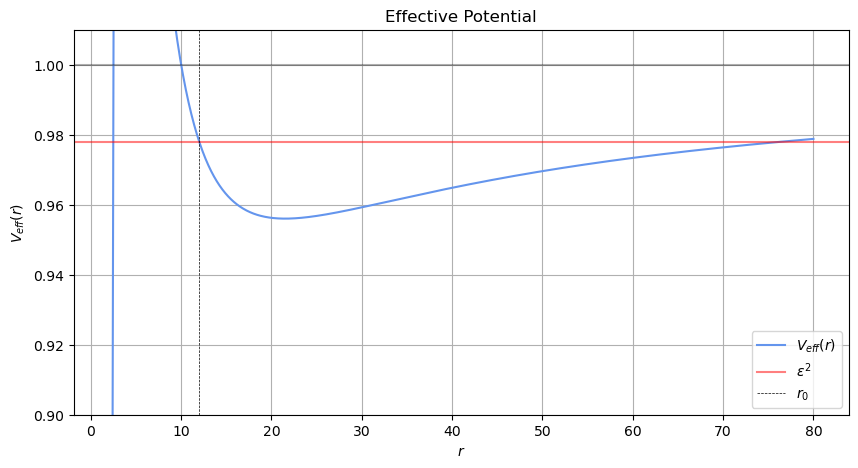

In [2]:

def Veff(r, L):
    '''
    Effective Potential
    '''
    return (1 - 2*M/r)*(1 + (L/r)**2)


# Mass of the central object
M = 1.

# Initial condition at one of the apsis
r0 = 12.
dotr0 = 0.

L = 5.

# Energy of the particle
energy = sqrt(Veff(r0,L=L))
print('Energy of the particle: ', energy)

x0 = [1/r0, dotr0]
print('Initial conditions: [r_0, dotr_0] = ', [r0, dotr0])
print('Initial conditions: [u_0, z_0] = ', [1/r0, dotr0])

rrange = np.linspace(2,80,1000)
plt.figure(figsize=(10,5))
plt.plot(rrange, Veff(rrange,L=L), color='cornflowerblue', label= r'$V_{eff}(r)$')

plt.axhline(1, color = 'black', alpha=0.3)
plt.axhline(energy**2, color = 'red', alpha=0.5, label=r'$\varepsilon^2$')
plt.axvline(r0, color='black',linewidth=0.5, linestyle='--', label=r'$r_0$')

plt.title('Effective Potential')
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{eff}(r)$')
plt.grid()
plt.ylim(0.9,1.01)
plt.legend()

plt.show()
    

In [3]:
# Range of the angle phi
phi_i = 0.
phi_f = 40.
n = 1000000

phi_range = np.linspace(phi_i, phi_f,n)

sol = solve_ivp(orbit, [phi_i, phi_f], x0, t_eval = phi_range)

sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.000e-05 ...  4.000e+01  4.000e+01]
        y: [[ 8.333e-02  8.333e-02 ...  4.129e-02  4.129e-02]
            [ 0.000e+00 -4.243e-07 ... -1.676e-02 -1.676e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 230
     njev: 0
      nlu: 0

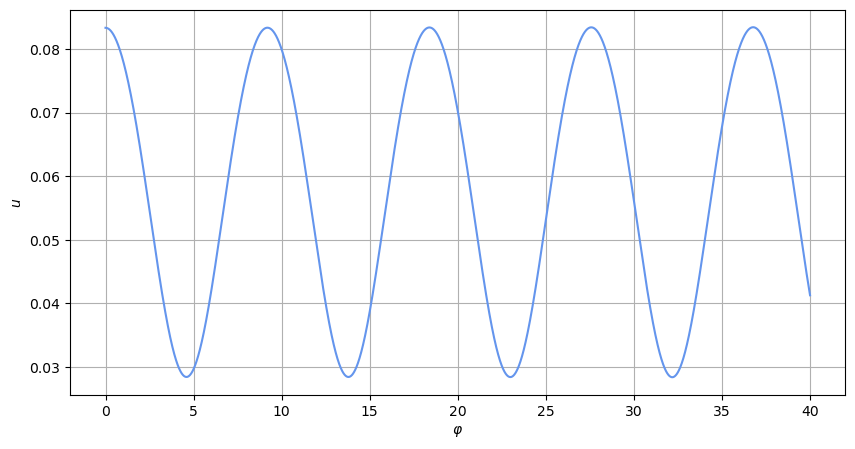

In [4]:
plt.figure(figsize=(10,5))
plt.plot(phi_range, sol.y[0], color='cornflowerblue')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$u$')
plt.grid()
plt.show()

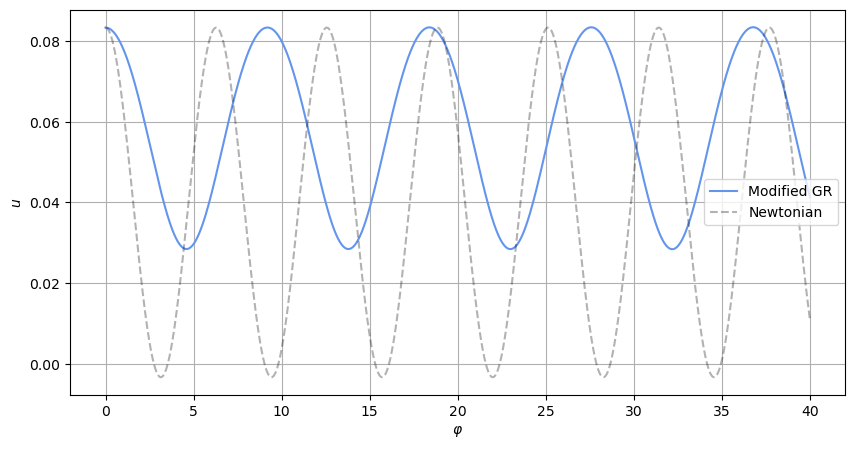

In [5]:
Nsol = solve_ivp(N_orbit, [phi_i, phi_f], x0, t_eval = phi_range)

plt.figure(figsize=(10,5))
plt.plot(phi_range, sol.y[0], color='cornflowerblue', label='Modified GR')
plt.plot(phi_range, Nsol.y[0], '--k',alpha=0.3, label='Newtonian')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$u$')
plt.grid()
plt.legend()
plt.show()

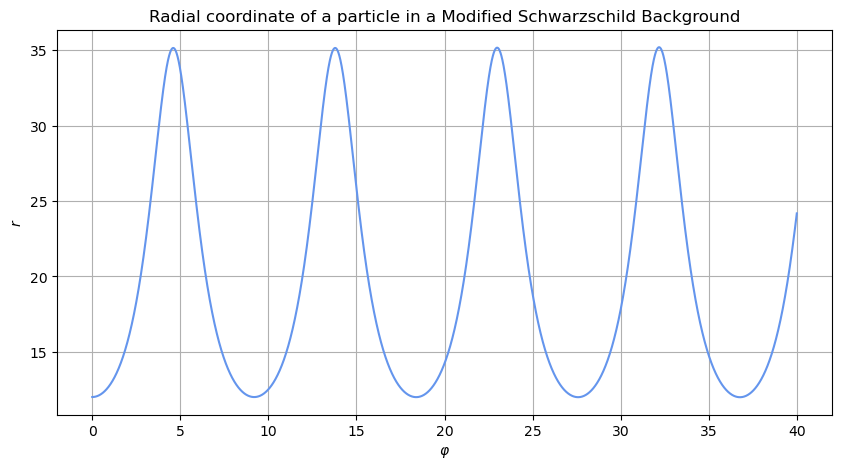

In [6]:
solr = 1/sol.y[0]
plt.figure(figsize=(10,5))
plt.plot(phi_range[::100], solr[::100], color='cornflowerblue')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$r$')
plt.title(r'Radial coordinate of a particle in a Modified Schwarzschild Background')
plt.grid()
plt.show()

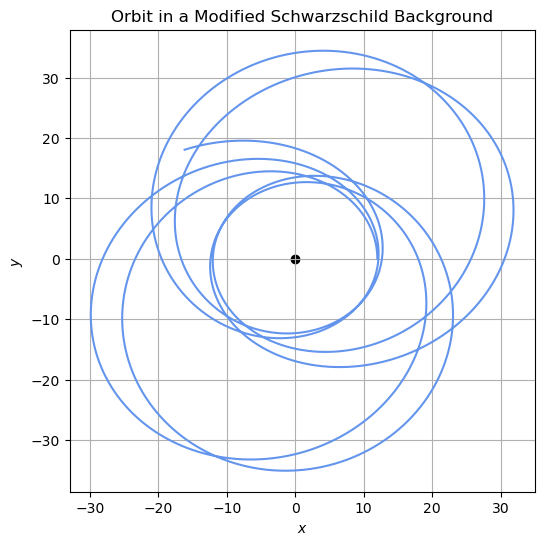

In [7]:
#Cartesian Coodinates Solution
solx = solr*cos(phi_range)
soly = solr*sin(phi_range)

plt.figure(figsize=(6,6))
plt.scatter(0,0, color='black')
plt.plot(solx, soly, color='cornflowerblue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Orbit in a Modified Schwarzschild Background')
plt.grid()
plt.show()

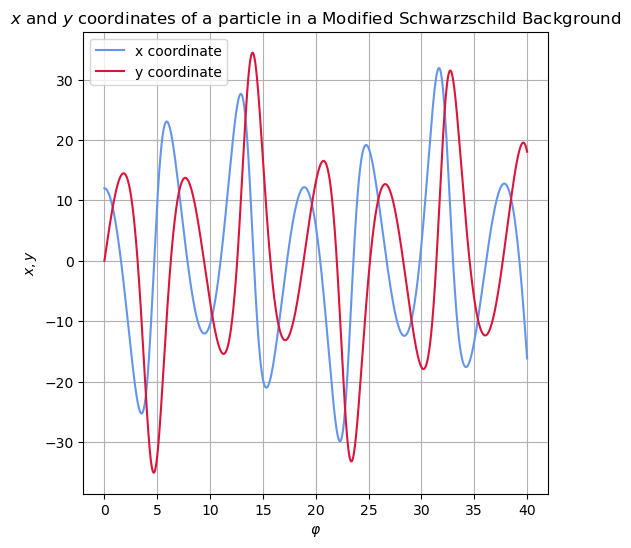

In [8]:
plt.figure(figsize=(6,6))
plt.plot(phi_range, solx, color='cornflowerblue', label='x coordinate')
plt.plot(phi_range, soly, color='crimson', label='y coordinate')
plt.xlabel(r'$\varphi$')

plt.ylabel(r'$x,y$')
plt.title(r'$x$ and $y$ coordinates of a particle in a Modified Schwarzschild Background')
plt.grid()
plt.legend()
plt.show()

In [9]:
# Save data of the orbit
orbit_data = np.array([phi_range, sol.y[0]]).T


np.savetxt('../06. Schwarzschild MOD/Schwarzschild_MOD_orbit.txt', orbit_data, header='phi, u')